# Tutorial

This tutorial contains several examples of GaussianRandomFields.

In [1]:
using PyPlot, GaussianRandomFields

## 1D Exponential covariance function

In this first example, we consider the exponential covariance function $C(r) = \exp(-r/\lambda)$ with length scale $\lambda=0.1$. Sample paths of a Gaussian process with an exponential covariance function are typically non-smooth. First, define the covariance stucture using `Exponential`.

In [2]:
exp = Exponential(0.1)

exponential (λ=0.1, σ=1.0, p=2.0)

A Gaussian process defined on $[0,1]$ that uses this covariance function can be generated with `CovarianceFunction`.

In [3]:
cov = CovarianceFunction(1,exp)

1d exponential covariance function (λ=0.1, σ=1.0, p=2.0)

Discretize the domain with step $\Delta t = 0.01$ and use a Cholesky factorization of the covariance matrix to generate samples of the Gaussian process.

In [4]:
pts = 0:0.01:1
grf = GaussianRandomField(cov,Cholesky(),pts)

Gaussian random field with 1d exponential covariance function (λ=0.1, σ=1.0, p=2.0) on a 101-point structured grid, using a Cholesky decomposition

Samples of the Gaussian process can be computed with the `sample`-function.

In [5]:
sample(grf)

101-element Array{Float64,1}:
 -1.47653   
 -0.841241  
 -1.77158   
 -1.48293   
 -0.607867  
 -0.00373287
 -0.54809   
 -0.874959  
 -0.863955  
 -0.659406  
 -0.542093  
 -0.673837  
 -0.925754  
  ⋮         
 -0.456788  
  0.190678  
  0.872299  
  0.483849  
  1.27096   
  1.61758   
  1.13759   
  1.25964   
  1.20904   
  1.50875   
  0.20528   
  0.515974  

It is also possible to provide your own random numbers to sample from the random field using the optional argument `xi`.

In [6]:
sample(grf,xi=randn(101));

Let us generate a figure of 5 different sample paths. For convenience, we provide several plotting commands using `PyPlot`.

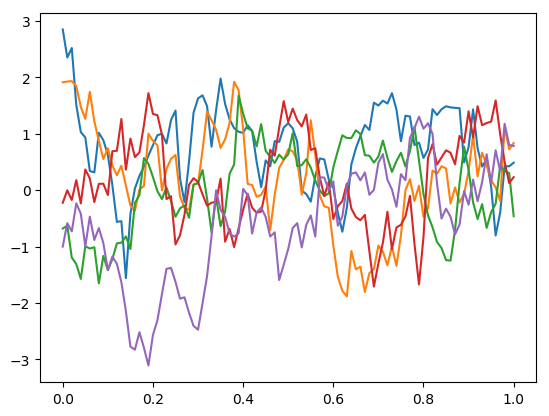

In [7]:
plot(grf,n=5)

## 2D Matérn covariance function

In this second example, we turn from Gaussian processes to Gaussian random fields ($d>1$). A well-known stationary isotropic covariance function is the Matérn covariance function

$C(r) = \frac{2^{1-\nu}}{\Gamma(\nu)}\left(\sqrt{2\nu}\frac{r}{\lambda}\right)^\nu K_\nu\left(\sqrt{2\nu}\frac{r}{\lambda}\right)$

where $\lambda$ is the correlation length and $\sigma$ is a smoothness parameter. Consider a Gaussian random field defined on $[0,1]^2$ that uses this covariance function.

In [8]:
mat = Matern(0.5,2.0)

Matérn (λ=0.5, ν=2.0, σ=1.0, p=2.0)

In [9]:
cov = CovarianceFunction(2,mat)

2d Matérn covariance function (λ=0.5, ν=2.0, σ=1.0, p=2.0)

In [10]:
pts = 0:0.02:1
grf = GaussianRandomField(cov,Cholesky(),pts,pts)

Gaussian random field with 2d Matérn covariance function (λ=0.5, ν=2.0, σ=1.0, p=2.0) on a 51x51 structured grid, using a Cholesky decomposition

Visualisation of this Gaussian random field is possible using `surf`, `contour` and `contourf`.

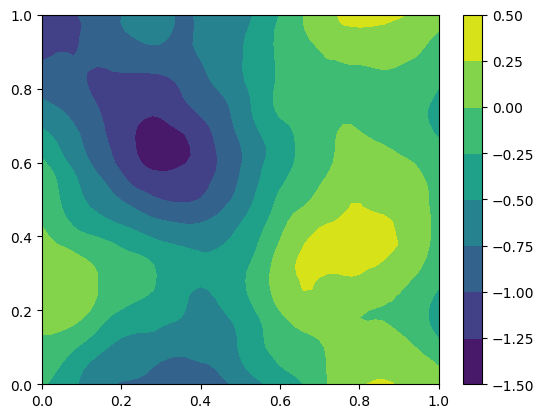

PyObject <matplotlib.colorbar.Colorbar object at 0x14743e210>

In [11]:
contourf(grf)

Here is a visual comparison of different random fields with a decreasing smoothness parameter $\nu$.

In [12]:
pts = 0:0.02:1
grfs = GaussianRandomField[]
for ν in [2 1.5 1 0.5]
    mat = Matern(0.5,ν)
    cov = CovarianceFunction(2,mat)
    push!(grfs,GaussianRandomField(cov,Cholesky(),pts,pts))
end

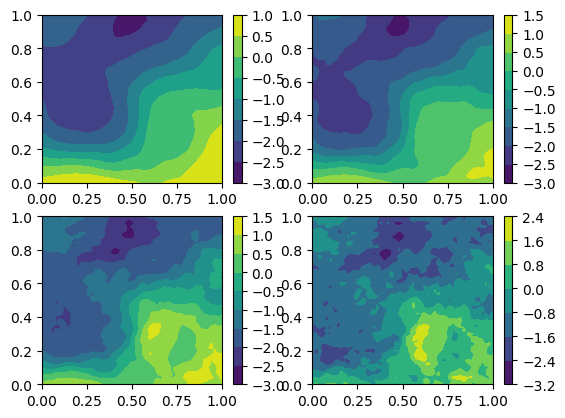

In [13]:
for i in 1:length(grfs)
    srand(0)
    subplot(2,2,i); contourf(grfs[i])
end

## Gaussian random field generators

There is an implementation available for most common methods to generate Gaussian random fields: Cholesky factorization, Karhunen-Loève (KL) expansion, and circulant embedding. Which method is best suited for your application depends amongst others on the correlation length and smoothness of the covariance function, and the number of points in the domain of interest. In general, we recommend the circulant embedding technique or the KL expansion.

### Cholesky factorization

The `Cholesky()` method uses a Cholesky factorization of the covariance matrix. That is, we compute $C=LL'$, where $L$ is a lower triangular matrix. Samples of the Gaussian random field are computed as $\boldsymbol{z}=L' \boldsymbol{\xi}$, where $\boldsymbol{\xi}$ is a vector of standard normal random numbers. As more and more points are used in the domain of interest, computing this approximation becomes too expensive. Furthermore, the expansion can only be computed when the covariance matrix is symmetric positive definite (SPD).

In [14]:
gau = Gaussian(0.1)
cov = CovarianceFunction(2,gau)
pts = 0:0.02:1
#grf = GaussianRandomField(cov,Cholesky(),pts,pts) # this will fail

0.0:0.02:1.0

If this is not the case, we can still compute an eigenvalue decomposition of the covariance matrix: $C=UDV'$. Samples are then provided using $\boldsymbol{z}= U\sqrt{D} \boldsymbol{\xi}$. If negative eigenvalues are detected, samples of the Gaussian random field will only be approximate.

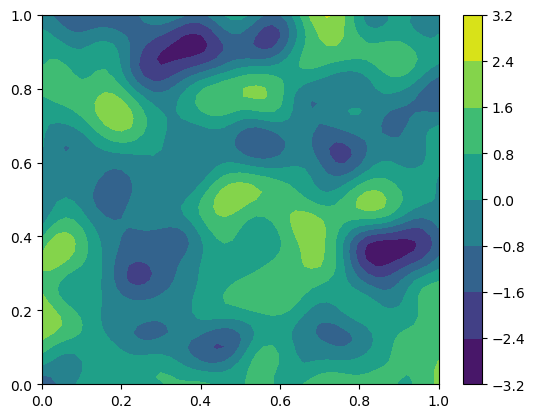

In [15]:
grf = GaussianRandomField(cov,Spectral(),pts,pts)
contourf(grf);

### Karhunen-Loève expansion

A KL expansion is a representation of a Gaussian process or random field is an infinite linear combination of
orthogonal functions, similar to a Fourier expansion:

$\boldsymbol{z}=\sum_n \sqrt{\theta_n} \psi_n \xi_n$.

We refer to [1] for details on the implementation. Collocation. `KarhunenLoeve(n)`, where `n` refers to the number of terms in the expansion.

In [16]:
exp =  Exponential(0.1)
cov = CovarianceFunction(2,exp)
pts = 0:0.01:1
grf = GaussianRandomField(cov,KarhunenLoeve(250),pts,pts)

Gaussian random field with 2d exponential covariance function (λ=0.1, σ=1.0, p=2.0) on a 101x101 structured grid, using a KL expansion with 250 terms

The decay of the eigenvalues is shown here:

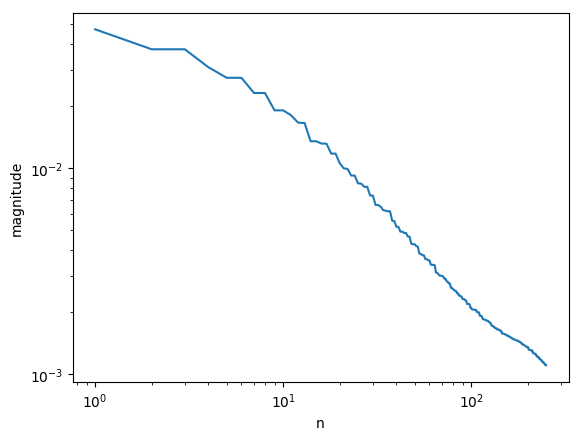

PyObject <matplotlib.text.Text object at 0x13a47dc90>

In [17]:
plot_eigenvalues(grf)

The first few eigenfunctions are shown below. Note that, as $n$ increases the eigenfunctions become more and more oscillatory.

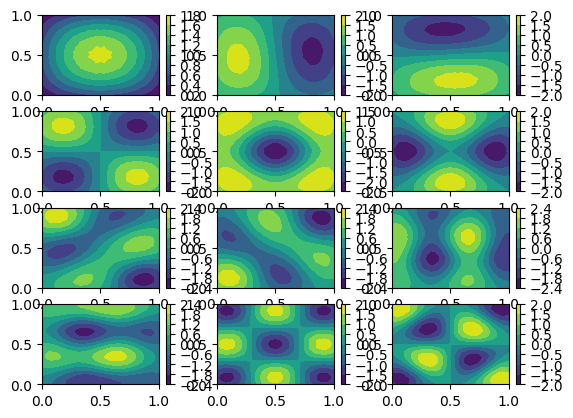

In [18]:
for i in 1:12
    subplot(4,3,i); plot_eigenfunction(grf,i)
end

There are several options to improve the numerical approximation of the KL expansion. The number of quadrature points (in one dimension) can be specified using the optional argument `nq`. The quadrature method can be `EOLE()` (default), `Midpoint()`, `Trapezoidal()`, `Simpson()` or `GaussLegendre()`.

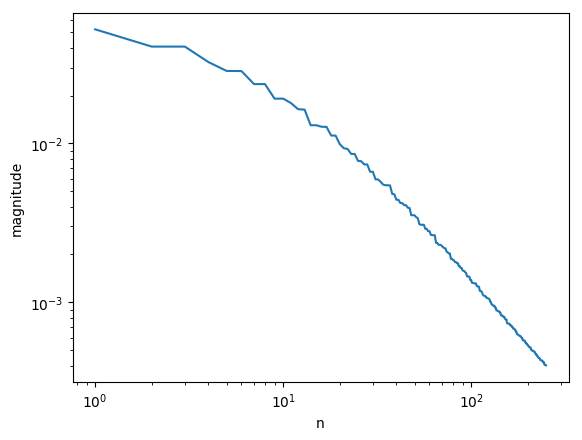

PyObject <matplotlib.text.Text object at 0x148241a10>

In [19]:
grf = GaussianRandomField(cov,KarhunenLoeve(250),pts,pts,nq=50,quad=GaussLegendre())
plot_eigenvalues(grf)

The more terms `n` are added in the expansion, the better the approximation using an `n`-term KL expansion will be. In fact, the KL expansion is the respresentation of a Gaussian random field that minimizes the *mean square error* for a finite number of terms `n`.

In [20]:
nterms = [1 2 5 10 20 50 100 200 500 1000]
error = []
for n in nterms
    grf = GaussianRandomField(cov,KarhunenLoeve(n),pts,pts)
    push!(error,rel_error(grf))
end

In [21]:
println(" #terms |  relative error")
println("--------------------------")
[@printf("   %4d |  %0.4f\n",nterms[i],error[i]) for i in 1:length(nterms)];

 #terms |  relative error
--------------------------
      1 |  0.7500
      2 |  0.5000
      5 |  0.4402
     10 |  0.3524
     20 |  0.1676
     50 |  0.1309
    100 |  0.0758
    200 |  0.0345
    500 |  0.0107
   1000 |  0.0032


### Circulant Embedding

*** this is work in progress ***

## Other Gaussian random fields

Generation of non-isotropic Gaussian random fields is possible by using the $p=1$ norm in the covariance function. The standard deviation of the random field can be adapted with the optional argument $\sigma$. Here is an example of an exponential covariance function with correlation length $\lambda=0.5$, norm $p=1$ and standard deviation $\sigma=0.5$.

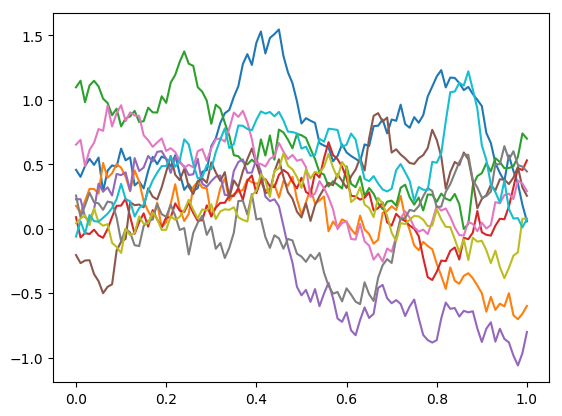

In [22]:
exp =  Exponential(0.5,σ=0.5,p=1)
cov = CovarianceFunction(1,exp)
pts = 0:0.01:1
grf = GaussianRandomField(cov,Cholesky(),pts)
plot(grf,n=10)

It is also possible to define a Gaussian random field on a non-equidistant structured grid. Below is an example on a Chebyshev grid.

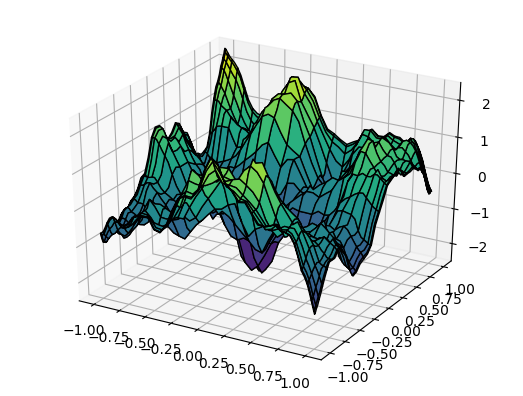

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x154507a50>

In [23]:
mat =  Matern(0.4,1.5)
cov = CovarianceFunction(2,mat)
pts = 0:0.02:1
pts = cos.(pi*pts)
grf = GaussianRandomField(cov,Cholesky(),pts,pts)
surf(grf)

## Custom covariance functions

Another well-known covariance function is the triangular (or *tent*) covariance 

$C(r)=1-\frac{r}{\lambda}$, $r \in [0,\lambda]$.

For this kernel, analytic expressions are known for both eigenvalues and eigenfunctions. It is very straightforward to add this covariance function. We only need to define a `Triangular` type, and implement the `apply()` function. 

In [24]:
struct Triangular{T} <: CovarianceStructure{T}
    λ::T
    σ::T
    p::T
end

GaussianRandomFields.apply(t::Triangular{T},x::T) where {T<:Real} = max(0.,1-x/t.λ)

import Base.show
show(io::IO, t::Triangular) = print(io, "Triangular (λ=$(t.λ), σ=$(t.σ), p=$(t.p))")

show (generic function with 347 methods)

Next, we can proceed as usual and compute a Gaussian random field that uses this tent covariance function with, for instance, a KL expansion.

In [25]:
t = Triangular(5.,1.,2.)
cov = CovarianceFunction(2,t)
grf = GaussianRandomField(cov,KarhunenLoeve(1000),0:0.01:1,0:0.01:1)

Gaussian random field with 2d Triangular covariance function (λ=5.0, σ=1.0, p=2.0) on a 101x101 structured grid, using a KL expansion with 1000 terms

A sample of this Gaussian random field looks like this:

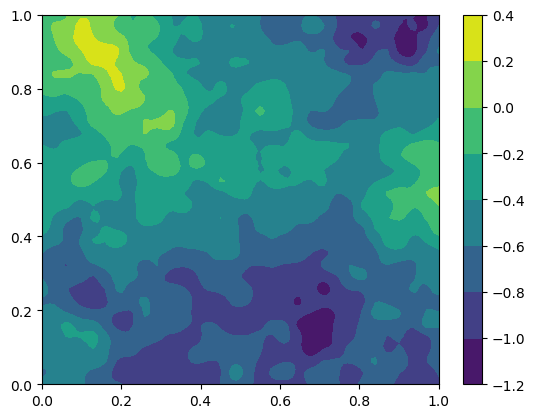

PyObject <matplotlib.colorbar.Colorbar object at 0x147939710>

In [26]:
contourf(grf)

The numerically computed eigenvalues and eigenfunctions are shown below.

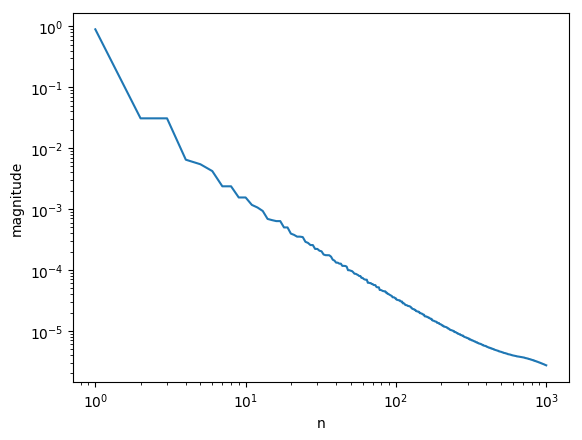

PyObject <matplotlib.text.Text object at 0x147a9ee10>

In [27]:
plot_eigenvalues(grf)

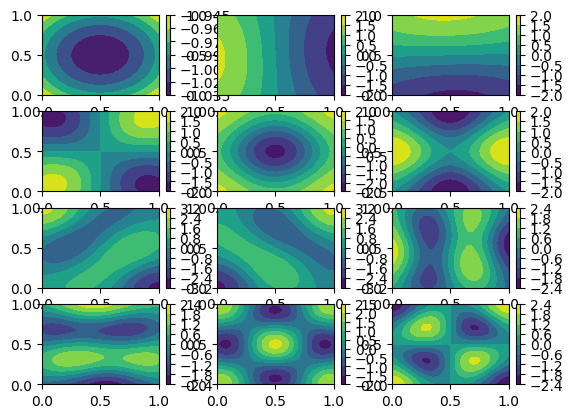

In [28]:
for i in 1:12
    subplot(4,3,i); plot_eigenfunction(grf,i)
end

## Gaussian random fields defined on a Finite Element mesh

Suppose the computational domain is not a square or rectangle, but is instead given as a Finite Element mesh. We can still compute a Gaussian random field in the points of this mesh. For example, a 7-pointed star has node table `p` and element table `t`.  

In [29]:
p = readdlm("../data/star.p");
t = readdlm("../data/star.t",Int64);

In [30]:
mat = Matern(0.75,2.0)
cov = CovarianceFunction(2,mat)
grf = GaussianRandomField(cov,Cholesky(),p,t)

Gaussian random field with 2d Matérn covariance function (λ=0.75, ν=2.0, σ=1.0, p=2.0) on a mesh with 720 points and 1284 elements, using a Cholesky decomposition

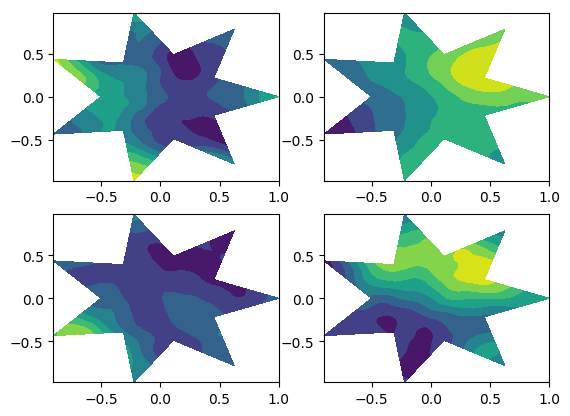

In [31]:
for i in 1:4
    subplot(2,2,i); tricontourf(grf,linewidth=0)
end

Alternatively, we can use a KL expansion where the collocation points are specified on a bounding box surrounding the FE mesh. 

In [32]:
grf = GaussianRandomField(cov,KarhunenLoeve(100),p,t)

Gaussian random field with 2d Matérn covariance function (λ=0.75, ν=2.0, σ=1.0, p=2.0) on a mesh with 720 points and 1284 elements, using a KL expansion with 100 terms

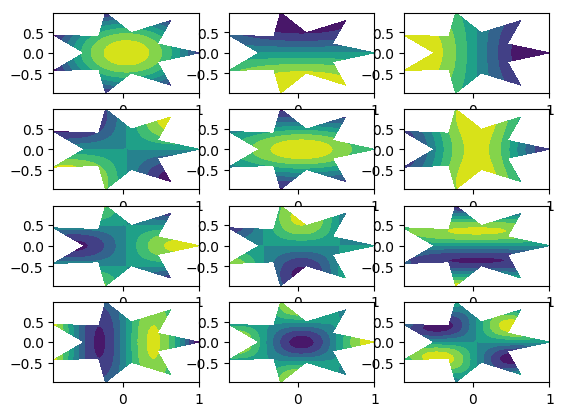

In [33]:
for i in 1:12
    subplot(4,3,i); plot_eigenfunction(grf,i,linewidth=0)
end

## 3D Gaussian random fields

Higher-dimensional random fiels are also implemented. For example, consider a three-dimensional Gaussian random field with Matérn covariance and $\lambda=0.1$, $\nu=2$.

In [34]:
mat = Matern(0.1,2.0)
cov = CovarianceFunction(3,mat)
pts = 0:0.02:1
grf = GaussianRandomField(cov,KarhunenLoeve(100),pts,pts,pts)

Gaussian random field with 3d Matérn covariance function (λ=0.1, ν=2.0, σ=1.0, p=2.0) on a 51x51x51 structured grid, using a KL expansion with 100 terms

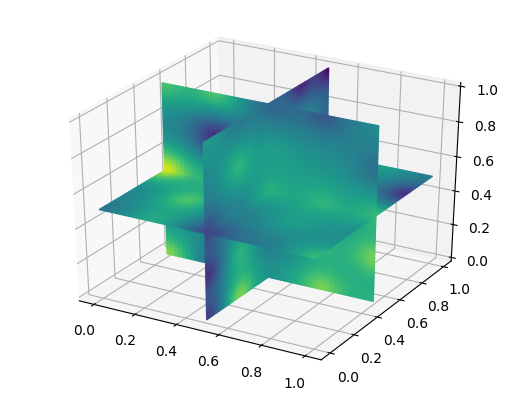

In [35]:
plot(grf)

For this computationally expensive covariance function, we could also use a separable covariance function, as in the next example.

## Separable non-stationary Gaussian random fields

Separable covariance functions $C(\boldsymbol{x},\boldsymbol{y})=C_1(\boldsymbol{x})C_2(\boldsymbol{y})$ have the property that their covariance matrix can be written as a tensor product of two vectors that only depend on $\boldsymbol{x}$ or $\boldsymbol{y}$ respectively. This can greatly reduce the computational cost of computing a Gaussian random field in many points. For example, to compute the KL expansion of a two-dimensional exponential covariance function with correlation length $\lambda=0.3$, we must compute the eigenvalue decomposition of two $m$-by-$m$ matrices (with $m$ the number of collocation points in each direction), instead of one $m^2$-by-$m^2$. This is more efficient both in memory and computation time.

In [40]:
exp = Exponential(0.3)
cov = SeparableCovarianceFunction(exp,exp)
grf = GaussianRandomField(cov,KarhunenLoeve(1000),0:0.01:1,0:0.01:1)

Gaussian random field with 2d separable covariance function [ exponential (λ=0.3, σ=1.0, p=2.0), exponential (λ=0.3, σ=1.0, p=2.0) ] on a 101x101 structured grid, using a KL expansion with 1000 terms

However, the visual artefacts of the tensor product are now clearly apparent in each sample.

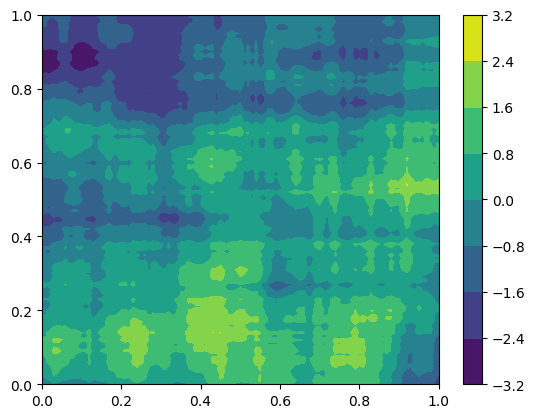

PyObject <matplotlib.colorbar.Colorbar object at 0x147f3a990>

In [41]:
contourf(grf)